<a href="https://colab.research.google.com/github/KashProgramming/djs-compute-daml-tasks/blob/main/DAML_Task3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Data used from https://archive.ics.uci.edu/dataset/186/wine+quality
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAML Tasks/Task3/winequality-red.csv",delimiter=";")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# There is no missing data in any column and all the data is of type float except the target column which is an integer
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


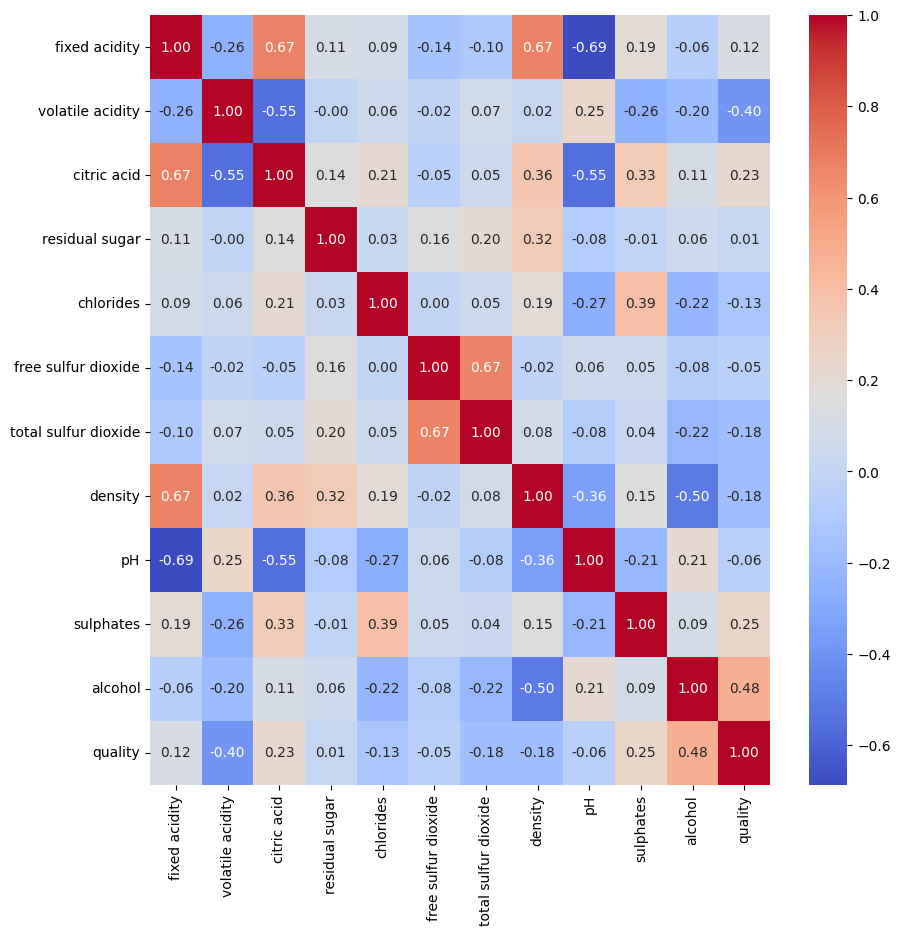

In [ ]:
# Finding the correlation between the attributes and displaying in the form of a heatmap
correlation_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


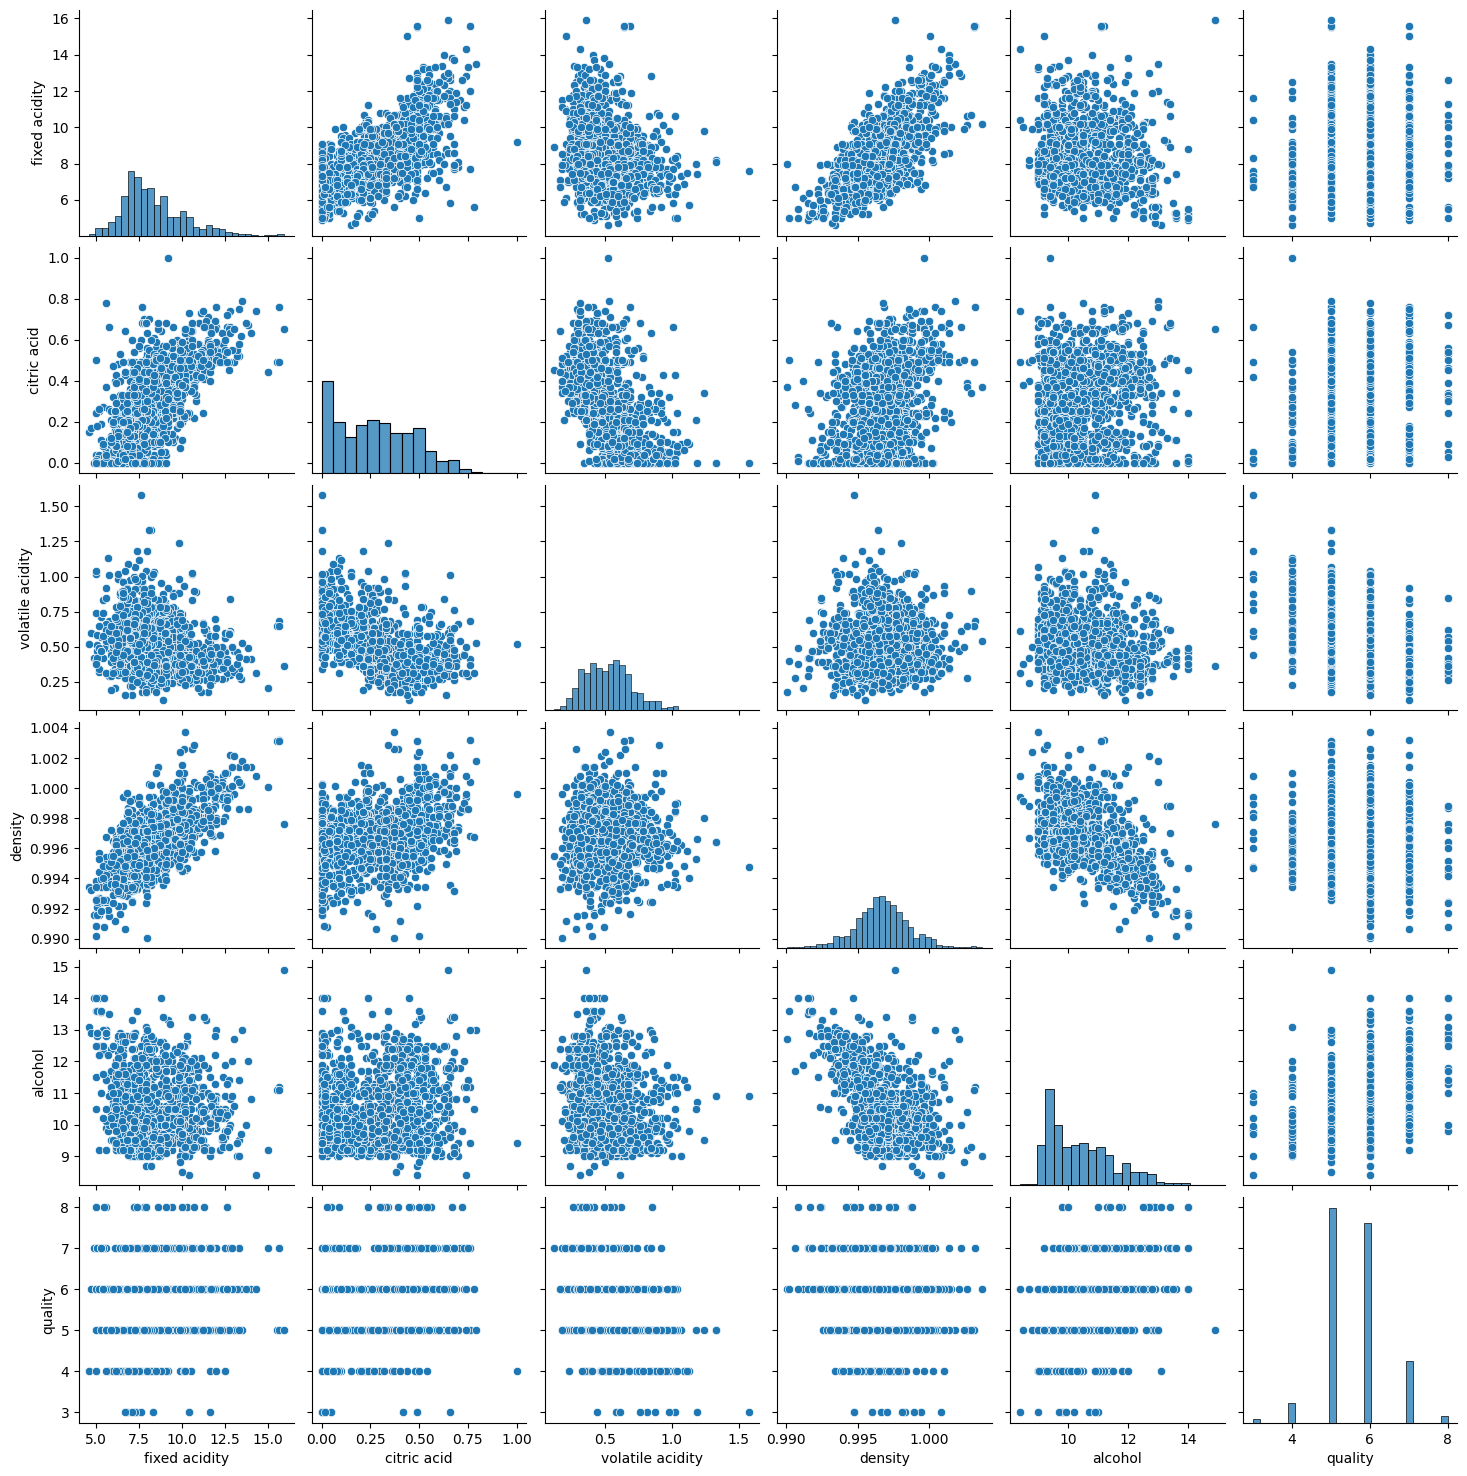

In [ ]:
# Select pairs of highly correlated features
selected_features=["fixed acidity","citric acid","volatile acidity","density","alcohol","quality"]
# Creating a pair plots to understand how correlated features are
sns.pairplot(df[selected_features])
plt.show()

In [ ]:
x=df.drop("quality",axis=1)
y=df["quality"]

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)
# Splitting the data into training and testing data with 65% training data
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.35,random_state=42,stratify=y_resampled)

In [ ]:
# Scaling the data to ensure it's not affected by outliers or varying ranges of values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning with different kernels
param_grid={
    "C": [0.1,1,10,100],
    "gamma": ["scale","auto"],
    "kernel": ["linear","poly","rbf","sigmoid"]
}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train)
# Train the model that works the best
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test_scaled)

In [ ]:
# Printing out the evaluation metrix like accuracy score, f1-score, precision and recall
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")

Accuracy: 0.8253968253968254
Confusion Matrix: 
[[115   0   0   0   0   0]
 [  0 111   1   1   2   0]
 [  1  16  67  27   4   1]
 [  0   6  33  59  15   3]
 [  0   0   1   7 105   3]
 [  0   0   0   0   0 115]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       115
           4       0.83      0.97      0.90       115
           5       0.66      0.58      0.61       116
           6       0.63      0.51      0.56       116
           7       0.83      0.91      0.87       116
           8       0.94      1.00      0.97       115

    accuracy                           0.83       693
   macro avg       0.81      0.83      0.82       693
weighted avg       0.81      0.83      0.82       693



In [ ]:
import pickle

In [ ]:
pickle.dump(best_model,open("/content/wine_SVM_predict.pkl","wb"))

In [ ]:
pickle.dump(scaler,open("/content/scaler.pkl","wb"))

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={0:"Quality"},inplace=True)
y_pred["ID"]=y_pred.index
y_pred

,Quality,ID
ID,,
0,6,0
1,8,1
2,7,2
3,4,3
4,6,4
...,...,...
688,4,688
689,3,689
690,3,690


In [ ]:
y_pred.to_csv("RedWine_Quality_Predictions.csv",index=False)